[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 

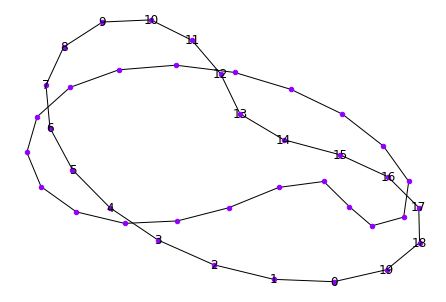

In [13]:
#SF NETWORK, ER NETWORK, FULLY CONNECTED, 
#FREQUENCY DISTRIBUTION GAUSSIAN, LORENTZIAN
#AVG DEGREE = 6, NODE = 50, 

import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
import math
from tqdm import tqdm
import cmath
import seaborn as sns #for the didstribution plot
from scipy import stats  #for the gaussian and lorentizian distribution
#import ewstools

N = 20



ring_matrix = [[ 0 for j in range(N)] for i in range(N)]
#print(ring_matrix)

for i in range(N-1):
    ring_matrix[i][i+1] = 1
    ring_matrix[i+1][i] = 1
ring_matrix[0][N-1] = 1
ring_matrix[N-1][0] = 1

ring_matrix = np.array(ring_matrix)
print(ring_matrix)


G = nx.from_numpy_matrix(ring_matrix)
nx.draw(G,node_color='#8F00FF',with_labels = True, node_size=20)

A = ring_matrix

print(A)

#GAUSSIAN distribution
#omega = np.random.normal(loc=0, scale=1, size=(N))

#LORENTZIAN DISTRIBUTION
omega =  np.random.uniform(0,2,size= (N))
#stats.cauchy.rvs(loc=0, scale=1, size=1000)
#omega_0  = 0 and gamma  = 0.5

for node in G.nodes():
    G.nodes[node]['w'] = omega[node]
    G.nodes[node]['theta'] = np.random.rand()
    G.nodes[node]['thetadot'] = 0

#nextG = G.copy() #copy graph

nx.draw(G,node_color='#8F00FF', node_size=20) #to draw


front_order = []
back_order = []

sns.kdeplot(omega)

plt.show() 

G= nx.barabasi_albert_graph(200,1)
G = G.to_undirected() # changed to undirected graph
#G.pos = nx.spring_layout(G) #to give nodes spring like structure
typ = 'SF'
nx.draw(G,node_color='#8F00FF', node_size=20) #to draw



G = nx.scale_free_graph(200, alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0, create_using=None, seed=None, initial_graph=None) #scale free directed network is created

nx.draw(G,node_color='#8F00FF', node_size=20) #to draw


Running the single code increasing and decreasing 

In [ ]:
def f(t0,theta, node,t): #function
    cpl = 0
    
    # sigma terms
    for j in range(N):
        cpl += A[node][j]*np.sin(theta[j]-theta[node])
        
    thetadot = G.nodes[node]['w'] + (lmd*abs(G.nodes[node]['w'])*cpl)/(sum(A[node]))
    return thetadot

# RK-4 method
def rk4(t0,y0,xn,n): #integrating algorithm

    # Calculating step size
    h = (xn-t0)/n

    time_series = []
    for i in range(n):
        temp = np.array(y0)
        time_series.append(y0)
        
        for node in G.nodes():
            k1 = h * (f(t0, y0, node, h))
            k2 = h * (f((t0+h/2), (y0+k1/2),node, h))
            k3 = h * (f((t0+h/2), (y0+k2/2),node, h))
            k4 = h * (f((t0+h), (y0+k3),node, h))
            k = (k1+2*k2+2*k3+k4)/6
            yn = y0[node] + k

            temp[node] = yn
            t0 = t0+h
        y0 = temp
        
        for node in G.nodes():
            G.nodes[node]['theta'] = y0[node]
    
    return time_series

def order(theta): #order parameter
    z = sum(np.exp(theta*1j))/len(theta)
    return np.absolute(z), np.angle(z)


lmd0 = 0.05
final_order = []
"""Kuramoto Oscillator function"""
laus = []
lmd_stp = 60
#h_lmd = int(lmd_stp/2)
for i in tqdm(range(lmd_stp)):
    lmd = lmd0*i
    print(lmd)
    # Inputs
    t0 = 0
    y0 = np.zeros(N)
    
    for i in range(N):
        y0[i] = G.nodes[i]['theta']
        
    xn = 10 #final point
    step = 2000 #number of iteration

    data = np.array(rk4(t0,y0,xn,step))
   
    oreder = order(data[-1])
    final_order.append(oreder[0])
    print(oreder[0])

plt.plot(final_order[0:lmd_stp])
#plt.plot(laus[h_lmd+1:(lmd_stp)],final_order[h_lmd+1:(lmd_stp)])
#plt.scatter(laus[0:h_lmd],final_order[0:h_lmd],c ="red", s=15)
#plt.scatter(laus[h_lmd+1:lmd_stp],final_order[h_lmd+1:(lmd_stp)],c ="green", s=15)
plt.xlabel("λ")
plt.ylabel("R")

plt.savefig("inc_dec_%d_%s"%(N,typ))

  0%|          | 0/60 [00:00<?, ?it/s]

0.0


  2%|▏         | 1/60 [00:17<16:50, 17.12s/it]

0.17623897535961544
0.05


  3%|▎         | 2/60 [00:34<16:51, 17.44s/it]

0.2075863783826884
0.1


  5%|▌         | 3/60 [00:51<16:18, 17.17s/it]

0.20833150720777419
0.15000000000000002


  7%|▋         | 4/60 [01:08<15:54, 17.05s/it]

0.3086221994597084
0.2


  8%|▊         | 5/60 [01:27<16:13, 17.70s/it]

0.3824154771137991
0.25


 10%|█         | 6/60 [01:46<16:24, 18.22s/it]

0.3413178716085195
0.30000000000000004


 12%|█▏        | 7/60 [02:04<15:58, 18.09s/it]

0.16038903314601324
0.35000000000000003


 13%|█▎        | 8/60 [02:20<15:10, 17.50s/it]

0.16261463086503003
0.4


 15%|█▌        | 9/60 [02:37<14:36, 17.19s/it]

0.379724973505002
0.45


 17%|█▋        | 10/60 [02:53<14:03, 16.87s/it]

0.2187819244028016
0.5


 18%|█▊        | 11/60 [03:09<13:37, 16.67s/it]

0.28235831495657776
0.55


 20%|██        | 12/60 [03:25<13:15, 16.58s/it]

0.30138544158292463
0.6000000000000001


 22%|██▏       | 13/60 [03:42<12:54, 16.49s/it]

0.29455568945381083
0.65


 23%|██▎       | 14/60 [03:58<12:35, 16.43s/it]

0.4268124782283016
0.7000000000000001


 25%|██▌       | 15/60 [04:14<12:15, 16.35s/it]

0.17518007113609743
0.75


 27%|██▋       | 16/60 [04:30<11:57, 16.32s/it]

0.37861592657196114
0.8


 28%|██▊       | 17/60 [04:47<11:39, 16.27s/it]

0.13371425360869305
0.8500000000000001


 30%|███       | 18/60 [05:03<11:24, 16.29s/it]

0.5189743683186626
0.9


 32%|███▏      | 19/60 [05:21<11:26, 16.74s/it]

0.19644357834679224
0.9500000000000001


 33%|███▎      | 20/60 [05:40<11:35, 17.39s/it]

0.16417806307712307
1.0


 35%|███▌      | 21/60 [05:57<11:23, 17.53s/it]

0.29089339732714065
1.05


 37%|███▋      | 22/60 [06:14<10:57, 17.29s/it]

0.2649477462710631
1.1


 38%|███▊      | 23/60 [06:32<10:47, 17.49s/it]

0.5915349138339443
1.1500000000000001


 40%|████      | 24/60 [06:49<10:24, 17.34s/it]

0.1203293671350526
1.2000000000000002


 42%|████▏     | 25/60 [07:06<10:06, 17.34s/it]

0.3512967635425758
1.25


 43%|████▎     | 26/60 [07:25<10:01, 17.70s/it]

0.22244294653739757
1.3


 45%|████▌     | 27/60 [07:44<10:00, 18.19s/it]

0.18616379845587316
1.35


 47%|████▋     | 28/60 [08:04<09:52, 18.53s/it]

0.5284946784224565
1.4000000000000001


 48%|████▊     | 29/60 [08:22<09:34, 18.54s/it]

0.4904462617088675
1.4500000000000002


 50%|█████     | 30/60 [08:39<09:04, 18.14s/it]

0.2859260479399194
1.5


 52%|█████▏    | 31/60 [08:57<08:40, 17.94s/it]

0.5210184279939964
1.55


 53%|█████▎    | 32/60 [09:14<08:16, 17.74s/it]

0.5304773660129121
1.6


 55%|█████▌    | 33/60 [09:32<07:58, 17.72s/it]

0.38653062624417944
1.6500000000000001


 57%|█████▋    | 34/60 [09:50<07:41, 17.77s/it]

0.36587296923930396
1.7000000000000002


 58%|█████▊    | 35/60 [10:07<07:24, 17.77s/it]

0.406266663009515
1.75


 60%|██████    | 36/60 [10:25<07:07, 17.83s/it]

0.5137765477626995
1.8


 62%|██████▏   | 37/60 [10:42<06:40, 17.41s/it]

0.4009605291582313
1.85


 63%|██████▎   | 38/60 [11:00<06:25, 17.54s/it]

0.36998194338797374
1.9000000000000001


 65%|██████▌   | 39/60 [11:18<06:10, 17.64s/it]

0.3144898234103486
1.9500000000000002


 67%|██████▋   | 40/60 [11:34<05:45, 17.28s/it]

0.1633983654129901
2.0


 68%|██████▊   | 41/60 [11:51<05:23, 17.03s/it]

0.18015623184775242
2.0500000000000003


 70%|███████   | 42/60 [12:07<05:03, 16.85s/it]

0.33424644943210224
2.1


 72%|███████▏  | 43/60 [12:23<04:44, 16.73s/it]

0.13923696584158715
2.15


 73%|███████▎  | 44/60 [12:40<04:28, 16.78s/it]

0.022224673086203316
2.2


 75%|███████▌  | 45/60 [12:57<04:13, 16.91s/it]

0.08101976565935061
2.25


 77%|███████▋  | 46/60 [13:15<03:58, 17.04s/it]

0.19223780062122475
2.3000000000000003


 78%|███████▊  | 47/60 [13:33<03:47, 17.47s/it]

0.3292174772417258
2.35


 80%|████████  | 48/60 [13:51<03:29, 17.49s/it]

0.36448111646324827
2.4000000000000004


 82%|████████▏ | 49/60 [14:07<03:08, 17.16s/it]

0.1574095982373132
2.45


 83%|████████▎ | 50/60 [14:25<02:53, 17.39s/it]

0.4556737668594069
2.5


 85%|████████▌ | 51/60 [14:42<02:35, 17.23s/it]

0.47792458182817016
2.5500000000000003


 87%|████████▋ | 52/60 [14:59<02:17, 17.23s/it]

0.2972988501693311
2.6


 88%|████████▊ | 53/60 [15:17<02:00, 17.28s/it]

0.40839277515432154
2.6500000000000004


 90%|█████████ | 54/60 [15:34<01:43, 17.27s/it]

0.37735006958320505
2.7


ts = ewstools.TimeSeries(data=final_order)

ts.detrend(method='Lowess', span=0.2)
ts.compute_var(rolling_window=0.5)
ts.compute_auto(lag=1, rolling_window=0.5)
ts.compute_auto(lag=2, rolling_window=0.5)
ts.compute_ktau()

print((final_order))
file = open("file1.txt", "w+")
content = str(final_order)
file.write(content)
file.close()

plt.plot(laus[0:50],final_order[0:50])
plt.plot(laus[51:100]final_order[51:100])
#plt.scatter(laus[0:99],final_order[101:200],c ="red", s=15)
plt.xlabel("lambda")
plt.ylabel("R")
plt.savefig("test2")



In [ ]:
print(final_order)

#backbackorder = final_order[51:100]
#backbackorder.reverse()


plt.plot(laus[0:h_lmd],final_order[0:h_lmd])
plt.plot(laus[h_lmd+1:(lmd_stp)],final_order[h_lmd+1:(lmd_stp)])
plt.scatter(laus[0:h_lmd],final_order[0:h_lmd],c ="red", s=15)
plt.scatter(laus[h_lmd+1:lmd_stp],final_order[h_lmd+1:(lmd_stp)],c ="green", s=15)


plt.xlabel("lambda")
plt.ylabel("R")

plt.savefig("inc_dec_50_ER")

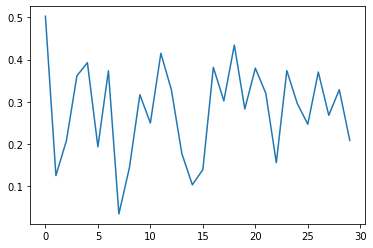

In [12]:
plt.plot(final_order[0:lmd_stp])
